### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix as cm

import os
starting_directory = os.getcwd()
os.chdir("archive_dataframes")                             # All the csv files are in archive_dataframes directory   starting_directory + "\\" + 


### Reading DataFrames that are created & combining them in to one DataFrame

In [2]:
df = pd.read_csv(os.listdir()[0])                               # Reading first dataframe

for i in range(1,10):
    df_dummy = pd.read_csv(os.listdir()[i])                     # Reading a dataframe
    list_of_dataframes = [df, df_dummy]
    df = pd.concat(list_of_dataframes, ignore_index=True)       # Appending it to main dataframe

os.chdir(starting_directory)
print(df.shape)
df.head()

(8732, 42)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,100648-1-0-0,-458.852208,54.472987,-0.354782,-5.420509,-4.833549,-8.203389,-15.698002,-3.326693,-4.583599,...,-0.482120,-0.922345,1.762407,-3.423761,-2.290337,-1.124767,1.790613,-2.936575,-0.412744,car_horn
1,100648-1-1-0,-448.263515,54.760387,-8.887156,1.159189,-8.107995,-12.153162,-7.872774,-3.384088,-9.733895,...,-1.779253,-1.320522,2.485539,-4.898012,-2.803906,3.534088,1.255909,-7.499753,2.112319,car_horn
2,100648-1-2-0,-550.542407,27.620024,-5.018342,5.888297,-5.072524,-6.054349,-2.783565,-3.432212,-7.160883,...,0.578030,-2.039364,-0.300180,-0.804519,-1.299412,-2.413588,0.574557,-2.323122,-0.994150,car_horn
3,100648-1-3-0,-342.377805,68.933450,-13.504516,11.507217,-7.056891,-11.519361,-8.962671,-1.837157,-19.751329,...,2.881917,-1.053040,-1.786281,-3.925069,2.372586,-3.171969,-4.676545,-1.032859,2.522283,car_horn
4,100648-1-4-0,-209.303421,46.283464,-6.854885,6.537487,0.573484,-12.509450,-15.645269,3.419694,-17.512218,...,0.936365,-0.461889,-0.828304,-3.677241,2.747718,-1.457215,-2.387974,-2.699965,1.337122,car_horn


### Creating trining data and test data

In [3]:
X = df.iloc[:,1:-1]                 # separating main data from first and last column for indipendet variable matrix
y = df.iloc[:,-1]                   # Dependent variables
print("X:",X.shape, "   y:", y.shape)

X: (8732, 40)    y: (8732,)


### Splitting data into X_train, X_test, y_train, y_test 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(6985, 40) (1747, 40)


### Feature Selection (PCA)

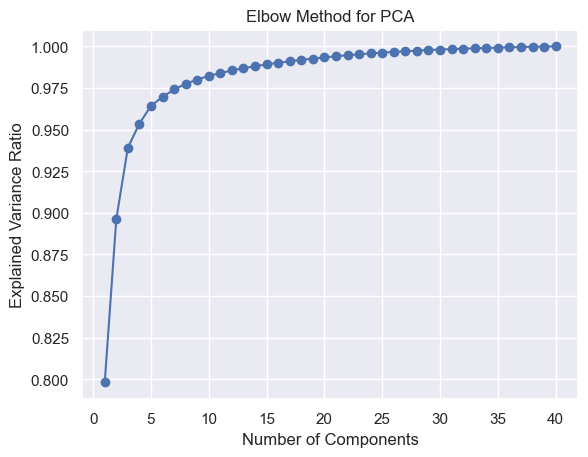

In [84]:
num_components = range(1,41)
explained_var_ratio = []

for n in num_components:                                                # Calculting varince for each no of components
    pca = PCA(n_components=n)
    pca.fit(X_train)
    explained_var_ratio.append(np.sum(pca.explained_variance_ratio_))

# Plot the elbow method diagram
plt.plot(num_components, explained_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for PCA')
plt.show()

Number of selected features are = 20, lost information is about 1%-2%.

In [85]:
pca = PCA(n_components=20)
X_train  = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape, X_test.shape)

(6985, 20) (1747, 20)


### Feature Scaling

In [86]:
scalar  = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.069579,-0.741972,-0.375227,1.204736,0.398535,-1.015141,0.662629,0.043121,-0.381006,-0.706620,0.329976,-0.080782,-0.803276,-0.271645,0.176630,0.326259,0.647341,0.439604,0.719009,0.507040
1,0.414978,-0.111189,0.165355,-1.371589,0.345635,0.042831,-1.312643,0.288011,-0.626842,-0.376359,1.223177,1.008323,0.204440,-1.106225,0.545228,-0.545664,0.143891,0.446324,-0.811813,0.005138
2,0.404873,1.444719,-0.051715,-0.436155,0.443054,-0.031678,-0.428462,-0.517787,-0.219666,-1.387248,0.422051,0.604407,-0.702062,0.929254,0.431006,-1.225488,0.073985,-0.419367,0.672130,0.052689
3,-0.071942,0.383321,-0.073038,0.486035,-0.376659,-0.937243,0.429777,0.080587,-0.608622,0.240427,-0.634040,0.134665,-0.739701,-1.534077,-0.184156,1.354454,0.230452,-0.268201,-0.459294,0.601745
4,0.199817,-0.926071,-0.718279,0.315824,-0.378371,-0.821238,0.193359,-0.354287,-0.228676,-0.328888,-0.485498,0.162965,-0.482985,-0.646830,-0.252539,-0.173934,-0.369749,0.108339,0.070805,0.103588


### KNN models

In [87]:
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='euclidean')                 # Model creation
    knn_model.fit(X_train,y_train)                                                      # Model Training
    y_pred = knn_model.predict(X_test)                                                  # Predicting the Results

    print(f"for number of neighbors = {i}, the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

for number of neighbors = 1, the accuracy of the model is 93.88%
for number of neighbors = 2, the accuracy of the model is 91.13%
for number of neighbors = 3, the accuracy of the model is 91.01%
for number of neighbors = 4, the accuracy of the model is 90.15%
for number of neighbors = 5, the accuracy of the model is 89.24%
for number of neighbors = 6, the accuracy of the model is 88.09%
for number of neighbors = 7, the accuracy of the model is 87.18%
for number of neighbors = 8, the accuracy of the model is 86.61%
for number of neighbors = 9, the accuracy of the model is 85.92%


In [88]:
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')                 # Model creation
    knn_model.fit(X_train,y_train)                                                      # Model Training
    y_pred = knn_model.predict(X_test)                                                  # Predicting the Results

    from sklearn.metrics import confusion_matrix
    print(f"for number of neighbors = {i}, the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

for number of neighbors = 1, the accuracy of the model is 94.1%
for number of neighbors = 2, the accuracy of the model is 91.24%
for number of neighbors = 3, the accuracy of the model is 91.01%
for number of neighbors = 4, the accuracy of the model is 90.38%
for number of neighbors = 5, the accuracy of the model is 89.07%
for number of neighbors = 6, the accuracy of the model is 88.9%
for number of neighbors = 7, the accuracy of the model is 87.52%
for number of neighbors = 8, the accuracy of the model is 86.89%
for number of neighbors = 9, the accuracy of the model is 85.92%


In [89]:
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')                 # Model creation
    knn_model.fit(X_train,y_train)                                                      # Model Training
    y_pred = knn_model.predict(X_test)                                                  # Predicting the Results

    from sklearn.metrics import confusion_matrix
    print(f"for number of neighbors = {i}, the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

for number of neighbors = 1, the accuracy of the model is 89.47%
for number of neighbors = 2, the accuracy of the model is 84.77%
for number of neighbors = 3, the accuracy of the model is 85.23%
for number of neighbors = 4, the accuracy of the model is 83.86%
for number of neighbors = 5, the accuracy of the model is 82.71%
for number of neighbors = 6, the accuracy of the model is 81.91%
for number of neighbors = 7, the accuracy of the model is 81.11%
for number of neighbors = 8, the accuracy of the model is 80.94%
for number of neighbors = 9, the accuracy of the model is 80.14%


In [101]:
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='cosine')                    # Model creation
    knn_model.fit(X_train,y_train)                                                      # Model Training
    y_pred = knn_model.predict(X_test)                                                  # Predicting the Results
    if i == 3:
        k_model = knn_model

    from sklearn.metrics import confusion_matrix
    print(f"for number of neighbors = {i}, the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

for number of neighbors = 1, the accuracy of the model is 94.68%
for number of neighbors = 2, the accuracy of the model is 91.64%
for number of neighbors = 3, the accuracy of the model is 91.76%
for number of neighbors = 4, the accuracy of the model is 91.01%
for number of neighbors = 5, the accuracy of the model is 90.56%
for number of neighbors = 6, the accuracy of the model is 89.7%
for number of neighbors = 7, the accuracy of the model is 89.12%
for number of neighbors = 8, the accuracy of the model is 88.49%
for number of neighbors = 9, the accuracy of the model is 87.81%


In [91]:
for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='hamming')                   # Model creation
    knn_model.fit(X_train,y_train)                                                      # Model Training
    y_pred = knn_model.predict(X_test)                                                  # Predicting the Results

    from sklearn.metrics import confusion_matrix
    print(f"for number of neighbors = {i}, the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

for number of neighbors = 1, the accuracy of the model is 11.28%
for number of neighbors = 2, the accuracy of the model is 11.28%
for number of neighbors = 3, the accuracy of the model is 11.28%
for number of neighbors = 4, the accuracy of the model is 10.59%
for number of neighbors = 5, the accuracy of the model is 10.36%
for number of neighbors = 6, the accuracy of the model is 10.59%
for number of neighbors = 7, the accuracy of the model is 10.59%
for number of neighbors = 8, the accuracy of the model is 10.59%
for number of neighbors = 9, the accuracy of the model is 11.22%


### Decision Tree Model

In [92]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)        # Model creation
clf_tree.fit(X_train, y_train)                                                          # Model Training
y_pred = knn_model.predict(X_test)                                                      # Predicting the Results

 
print(f"the accuracy of the model is {round(sum(100*(y_test==y_pred))/len(y_pred),2)}%")

the accuracy of the model is 11.22%


### Logistic Regression

In [93]:
log_model = LogisticRegression(solver='liblinear', random_state=0)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test) 

print(f"the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

the accuracy of the model is 54.04%


### Random Forest

In [107]:
forest_model = RandomForestClassifier(n_estimators = 100, random_state=5)
forest_model.fit(X_train,y_train)                                  # Model Training
y_pred = forest_model.predict(X_test) 
r_model = forest_model

print(f"the accuracy of the model is {round(sum(100*(y_pred==y_test))/len(y_pred),2)}%")

the accuracy of the model is 90.61%


#### We calculated these accuracy values for traning set sampling of 70%, 80%, 90%. In every time random forest model and KNN models gave consistant results around 90% results.

#### The best results were obtained by KNN model with distance matric "cosine". For KNN we get maximum accuracy when number of neighbors is 1, But we came to conclusion that it could be because overfitting fit. Apart from that maximum efficiency was obtainded when number of neighbors is 3, with accuracy of model is in decreasing motion with decrease in taining set size.

#### Here is the resulting confusion matrises for these 2 models

In [108]:
forest_model = RandomForestClassifier(n_estimators = 100)
forest_model.fit(X_train,y_train)
y_pred1 = forest_model.predict(X_test)


y_pred2 = k_model.predict(X_test)

print(f"the accuracy of the model is {round(sum(100*(y_test==y_pred1))/len(y_test),2)}%")
print(f"the accuracy of the model is {round(sum(100*(y_test==y_pred1))/len(y_test),2)}%")

cm1 = cm(y_test, y_pred1) 
cm2 =cm(y_test, y_pred2)

the accuracy of the model is 90.56%
the accuracy of the model is 90.56%


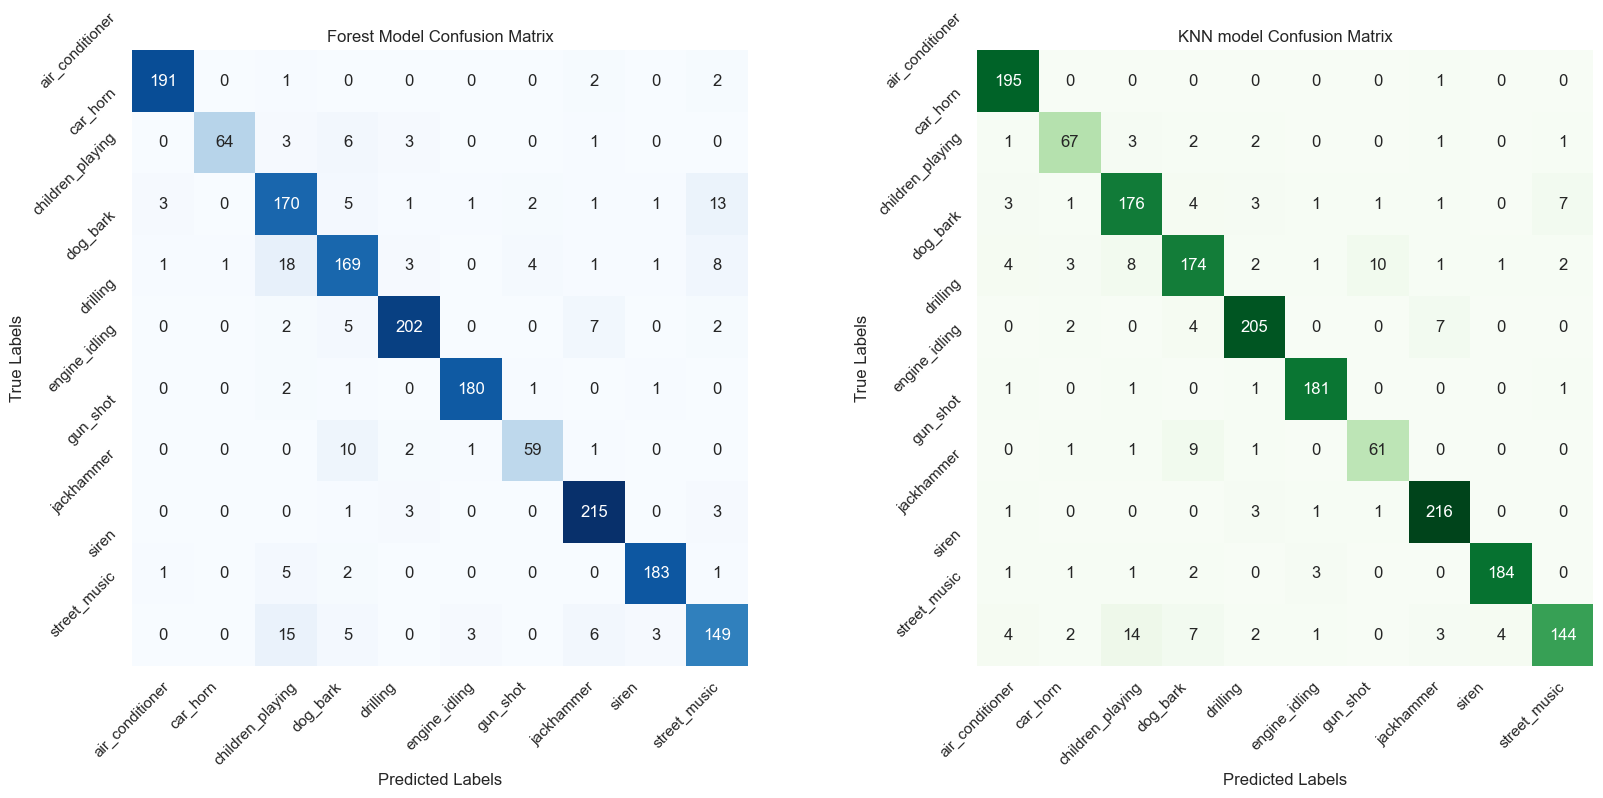

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax[0])
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", cbar=False, square=True, ax=ax[1])

# Set labels, title, and ticks
class_namess = np.unique(np.concatenate((y_test, y_pred)))
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Forest Model Confusion Matrix')

ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('KNN model Confusion Matrix')

plt.setp(ax[:], xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], xticklabels=class_namess)
plt.setp(ax[:], yticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], yticklabels=class_namess)

# Rotate x-axis labels if needed
for a in ax:
    a.tick_params(axis='y', labelrotation=45)
    a.tick_params(axis='x', labelrotation=45)

# Showing the plot
plt.show()


### Checking the model

In [80]:
def prediction(b):
    b = pca.transform(pd.DataFrame([b]))
    b = scalar.transform(b)
    return forest_model.predict(b) 


In [82]:
prediction( df.iloc[0,1:-1].tolist() )

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array(['car_horn'], dtype=object)